In [39]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np

# Data Source


https://www.kaggle.com/datasets/cdawn1/messy-vs-clean-room

# Collect Data

In [18]:
base_dir = r'C:\Users\alifs\Desktop\Machine Learning\Messy vs Clean Room\images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [20]:
os.listdir(train_dir)

['clean', 'messy']

In [21]:
os.listdir(validation_dir)

['clean', 'messy']

# Create Dir Train and  Valid

In [22]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [23]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [24]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Defining Model CNN

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train Model

In [27]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 3s - loss: 0.7011 - accuracy: 0.4900 - val_loss: 0.6929 - val_accuracy: 0.5000 - 3s/epoch - 137ms/step
Epoch 2/25
25/25 - 2s - loss: 0.6922 - accuracy: 0.5300 - val_loss: 0.6897 - val_accuracy: 0.5000 - 2s/epoch - 88ms/step
Epoch 3/25
25/25 - 2s - loss: 0.6765 - accuracy: 0.4900 - val_loss: 0.9420 - val_accuracy: 0.5000 - 2s/epoch - 89ms/step
Epoch 4/25
25/25 - 2s - loss: 0.6338 - accuracy: 0.5800 - val_loss: 0.5596 - val_accuracy: 0.7500 - 2s/epoch - 87ms/step
Epoch 5/25
25/25 - 2s - loss: 0.6316 - accuracy: 0.6200 - val_loss: 0.6417 - val_accuracy: 0.5500 - 2s/epoch - 88ms/step
Epoch 6/25
25/25 - 2s - loss: 0.6103 - accuracy: 0.7400 - val_loss: 0.5618 - val_accuracy: 0.7000 - 2s/epoch - 90ms/step
Epoch 7/25
25/25 - 2s - loss: 0.6091 - accuracy: 0.6400 - val_loss: 0.5418 - val_accuracy: 0.8000 - 2s/epoch - 92ms/step
Epoch 8/25
25/25 - 2s - loss: 0.5847 - accuracy: 0.7000 - val_loss: 0.6459 - val_accuracy: 0.6000 - 2s/epoch - 87ms/step
Epoch 9/25
25/25 - 2s - loss: 0

# Plotting Result

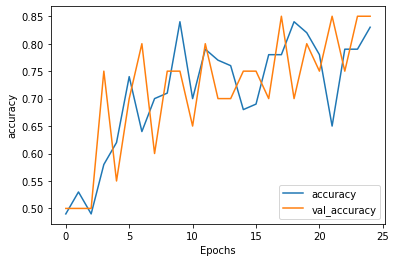

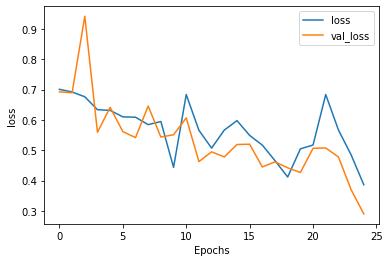

In [33]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Saving Model

In [34]:
model.save('model_C4.h5')

In [35]:
from keras.models import load_model
model = load_model('model_C4.h5')

In [41]:
def pred(path):
    image = tf.keras.preprocessing.image.load_img(path,target_size=(150, 150))
    input_arr = numpydata = np.array(image)
    x = np.expand_dims(input_arr, axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    imgplot = plt.imshow(image)
    plt.show()
    if classes==0:
        print('clean')
    else:
        print('messy')
    return path

# Predicting Model with New Data

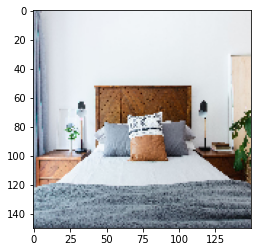

messy


'clean.jpg'

In [42]:
pred('clean.jpg')

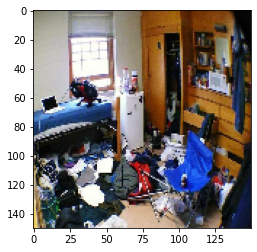

messy


'messy.jpg'

In [43]:
pred('messy.jpg')